# Описание проекта

Нужно подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, воспользуемся библиотеками *pandas*, *matplotlib* и *sklearn.* Поможет их документация.

Данные находятся в трёх файлах.

Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.

Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.

Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.

В распоряжении сырые данные: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, проверим их на корректность.

# Библиотеки

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.base import clone
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

## 1. Подготовка данных

### Прочтение файлов и предварительный осмотр данных

In [2]:
full = pd.read_csv('/datasets/gold_recovery_full.csv')
train = pd.read_csv('/datasets/gold_recovery_train.csv')
test = pd.read_csv('/datasets/gold_recovery_test.csv')

In [3]:
display(full.head())
full.info()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [4]:
display(train.head())
train.info()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [5]:
display(test.head())
test.info()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

### Микровывод:

Три файла открыты и изучены. Имеется большое количество цифр, чисел, букв, строк и столбцов.

Если в обучающей и полной таблицах имеется по 87 столбцов с признаками и показателями, то в тестовой- только 53. В тестовом наборе нет целевых признаков, а некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. 

Все столбцы во всех таблицах- объекты типа float, при этом столбец date имеет тип object. Исправим это, переведя дату в datetime: так с данными будет проще работать.

In [6]:
test['date'] = pd.to_datetime(test['date'], format ='%Y-%m-%d %H:%M:%S')
train['date'] = pd.to_datetime(train['date'], format ='%Y-%m-%d %H:%M:%S')
full['date'] = pd.to_datetime(full['date'], format ='%Y-%m-%d %H:%M:%S')

С типами данных теперь всё в порядке. Но сами данные сырые: их просто выгрузили из хранилища.

### Проверка правильного рассчёта эффективности обогащения.

__rougher.output.recovery__ Считается так:

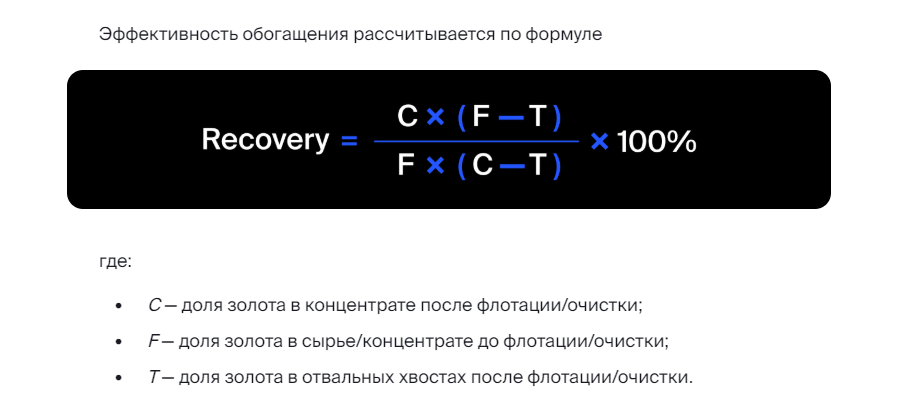

Соответственно, если данный этап rougher, то значения

C = rougher.output.concentrate_[тип сырья]

F = rougher.input.feed_[тип сырья]

T = rougher.output.tail_[тип сырья]

Напишем соответствующую функцию и применим к золоту. Про остальные типы сырья вопроса в задаче не стоит.

In [7]:
def recovery(c, f, t):
    return ( c * (f-t) ) / ( f * (c-t) ) * 100

__Применение__

In [8]:
check_au_reco = train.loc[:,['rougher.output.recovery']]

In [9]:
check_au_reco['recovery_check_au'] = recovery(train['rougher.output.concentrate_au'],
                                      train['rougher.input.feed_au'], train['rougher.output.tail_au'])

In [10]:
check_au_reco

,rougher.output.recovery,recovery_check_au
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794
...,...,...
16855,89.574376,89.574376
16856,87.724007,87.724007
16857,88.890579,88.890579
16858,89.858126,89.858126


In [11]:
print('Число строк в оригинальной метрике', check_au_reco['rougher.output.recovery'].count())
print('Число строк в посчитанной вручную метрике', check_au_reco['recovery_check_au'].count())

Число строк в оригинальной метрике 14287
Число строк в посчитанной вручную метрике 14577


Число строк различается: в оригинальной эффективности (rougher.output.recovery) имеются пропуски.

На первый взгляд расчёт верный. Проверим метрику Mean Absolute Error: там, где это возможно и пропусков нет.

In [12]:
# Табличка с двумя столбцами, для расчётов. Удаляем пропуски.
check_au_reco = check_au_reco.loc[:, ['rougher.output.recovery', 'recovery_check_au']].dropna()

In [13]:
# Без пропусков (в обоих столбцах recovery: ручном и исходном) в таблице остаётся 14287 данных. 
#Столько же, сколько было строк в оригинальной метрике.
check_au_reco.shape

(14287, 2)

In [14]:
print('Mean Absolute Error', mean_absolute_error(check_au_reco['rougher.output.recovery'], check_au_reco['recovery_check_au']))

Mean Absolute Error 9.444891926100695e-15


### Микровывод

Эффективность восстановления в обучающем датафрейме расчитана верно: значение MAE для имеющихся у нас данных стремится к нулю;

Но в столбцах имеются пропуски: из 16860 (всего имеется в датасете) предполагаемых строк с оригинальным значением эффективности в таблице имеются лишь 14287, а посчитать вручную значение recovery можно только для 14577 строк.

### Признаки, недоступные в тестовой выборке. 

In [15]:
for i in train.columns:
    if i not in  test.columns:
        print(i)

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

### Микровывод

В тестовой выборке отсутствуют output и calculation признаки, в том числе целевые признаки (эффективности обогащения)

Вызвано это тем, что тестовая выборка не содержит данных, которые можно получить только в результате технологического процесса.

### Предобработка данных


Из подсчёта MAE видно, что в датасетах имеются пропуски, по крайней мере, в столбцах, связанных с расчётом эффективности концентрации. Удалим их сразу.

In [16]:
columns_recovery = [
    'rougher.output.concentrate_au', 
    'rougher.input.feed_au', 
    'rougher.output.tail_au', 
    'rougher.output.recovery'
]

train = train.dropna(subset = columns_recovery)
full = full.dropna(subset = columns_recovery)
test = test.dropna(subset = ['rougher.input.feed_au'])

Имеющиеся дупликаты должны быть отброшены:

In [17]:
test = test.drop_duplicates().reset_index(drop = True)
full = full.drop_duplicates().reset_index(drop = True)
train = train.drop_duplicates().reset_index(drop = True)

Тестовой выборке вернём целевые признаки: они будут нужны в дальнейшем. Это столбцы `rougher.output.recovery`; `final.output.recovery`

In [18]:
test = test.merge(full.loc[:,['rougher.output.recovery', 'final.output.recovery', 'date']], on = 'date', how = 'left')

Удалим пропуски в целевых признаках

In [19]:
train.dropna(subset=['rougher.output.recovery', 'final.output.recovery'], inplace=True)
test.dropna(subset=['rougher.output.recovery', 'final.output.recovery'], inplace=True)

Как видно из info() в первичном осмотре данных, пропуски имеются и в других столбцах.

Данные, полученные в близкое время, близки друг другу численно, так что заполним пропуски методом ffill

In [20]:
train = train.fillna(method='ffill')
test = test.fillna(method='ffill')

В дальнейшем нужно изучить концентрации металлов на различных этапах очистки. Проверим на наличие выбросов.

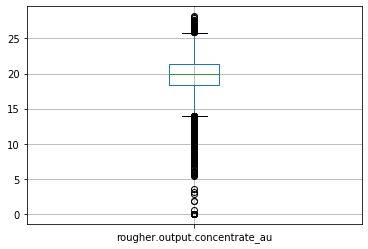

In [21]:
train.boxplot(column = 'rougher.output.concentrate_au')


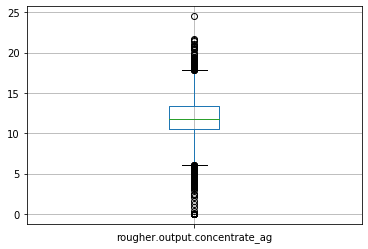

In [22]:
train.boxplot(column = 'rougher.output.concentrate_ag')

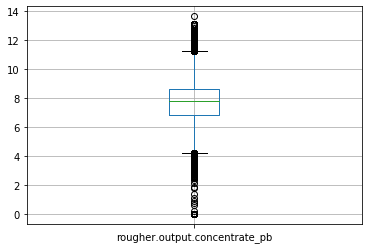

In [23]:
train.boxplot(column = 'rougher.output.concentrate_pb')

Выбросы есть, и их много. Но удалять их некорректно- ведь это реальные данные.

## Вывод

__Три файла открыты и изучены.__ Имеется большое количество цифр, чисел, букв, строк и столбцов.

- Если в обучающей и полной таблицах имеется по 87 столбцов с признаками и показателями, то в тестовой- только 53. В тестовом наборе нет целевых признаков, а некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. 

- Все столбцы во всех таблицах- объекты типа float, при этом столбец date имеет тип object. Исправим это, переведя дату в datetime: так с данными будет проще работать.

__Была рассчитана вручную эффективность обогащения золота:__ значения практически не расходятся с данными в таблице, что значит, что эффективность рассчитана правильно.

- Из подсчёта MAE стало видно, что в датасетах имеются пропуски, по крайней мере, в столбцах, связанных с расчётом эффективности концентрации. Они были удалены.

- Пропуски в других столбцах были заполнены методом _ffill_, так как значения, полученные в близкое время, близки друг к другу численно.

__Все три датасета также избавлены от дупликатов.__

В данных по концентрации металлов содержатся выбросы, но удалять их некорректно - чтобы избежать их влияния, в дальнейшем выбросы будут просто учитываться.

## 2. Анализ данных

### Как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки


За концентрацию отвечают столбцы с concetrate в названии. Посмотрим, как меняется концентрация металлов на этапах: 

- rougher — флотация

- primary_cleaner — первичная очистка

- secondary_cleaner — вторичная очистка - на этом этапе значений концентраций нет, потому что сразу по завершении вторичной очистки получается финальный продукт

- final — финальные характеристики

__Золото__

In [24]:
print('rougher',train['rougher.output.concentrate_au'].mean())
print('primary', train['primary_cleaner.output.concentrate_au'].mean())
print('final', train['final.output.concentrate_au'].mean())

rougher 19.43995785143646
primary 32.386835978391346
final 44.00379162105571


__Свинец__

In [25]:
print('rougher', train['rougher.output.concentrate_pb'].mean())
print('primary', train['primary_cleaner.output.concentrate_pb'].mean())
print('final', train['final.output.concentrate_pb'].mean())

rougher 7.664554751481546
primary 9.568544006770484
final 10.132847758146394


__Серебро__

In [26]:
print('rougher',train['rougher.output.concentrate_ag'].mean())
print('primary', train['primary_cleaner.output.concentrate_ag'].mean())
print('final', train['final.output.concentrate_ag'].mean())

rougher 11.775812314356036
primary 8.200915815165981
final 5.141920924857091


### Микровывод

- По ходу очистки концентрация золота растёт (с 19 % после флотации до 43 % в конце), что соответствует логике процесса.

- При этом падает концентрация серебра (с 12% до 5 %) - равномерно на каждом шагу.

- Концентрация Pb при этом несущественно меняется.

Однако со свинцом сложно сказать наверняка, что происходит с его концентрацией при разных этапах очиски. Посмотрим графически с помощью boxplot:




In [1]:
fig = plt.figure(figsize=(12, 10))
ax = sns.boxplot(data=train[[
        'rougher.output.concentrate_pb', 
        'primary_cleaner.output.concentrate_pb',
        'final.output.concentrate_pb']
    ])
ax.set_ylabel('{0} ({1}) - концентрация в зависимости от этапа очистки'.format('Свинец', 'pb'))
ax.set_xticklabels(['Флотация','Первичная очистка','Финальный продукт'])

NameError: name 'plt' is not defined

Исходя из графика, концентрация Свинца в зависимости от этапа меняется незначительно.

### Распределение гранул сырья на тестовой и обучающей выборках

[Text(0, 0, 'Обучающая'), Text(0, 0, 'Тестовая')]

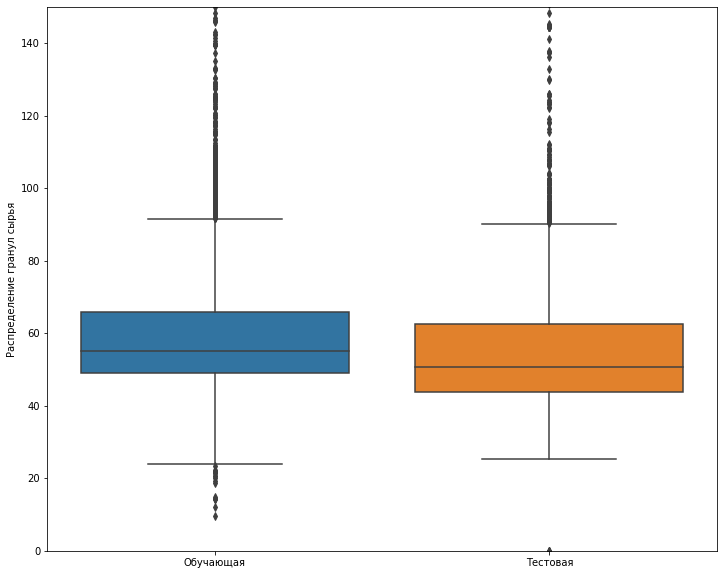

In [28]:
fig = plt.figure(figsize=(12, 10))
ax = sns.boxplot(data = (train['rougher.input.feed_size'], test['rougher.input.feed_size']))
ax.set_ylim(0,150)
ax.set_ylabel('Распределение гранул сырья')
ax.set_xticklabels(['Обучающая','Тестовая'])

### Микровывод

Построенный boxplot показывает, что медианный размер гранул сырья в выборках отличается незначительно. 

В Тестовой выборке меньше выбросов, что слегка сдвигает медиану.

Распределения несильно отличаются друг от друга, оценка модели будет правильной.

### Суммарная концентрация веществ на разных стадиях

__Стадии:__ rougher_input, rouger_output и final (в сырье, в черновом и финальном концентратах.)

In [29]:
#rougher_input

train.loc[:,'total_rougher_input_concetrate'] = (
    train['rougher.input.feed_ag'] 
    + train['rougher.input.feed_pb'] 
    + train['rougher.input.feed_sol']
    + train['rougher.input.feed_au']
)

#rougher_output

train.loc[:,'total_rougher_output_concetrate'] = (
    train['rougher.output.concentrate_ag'] 
    + train['rougher.output.concentrate_pb'] 
    + train['rougher.output.concentrate_sol']
    + train['rougher.output.concentrate_au']
)

#final

train.loc[:,'total_final_output_concetrate'] = (
    train['final.output.concentrate_ag'] 
    + train['final.output.concentrate_pb'] 
    + train['final.output.concentrate_sol']
    + train['final.output.concentrate_au']
)

[Text(0, 0, 'Исходное сырье'),
 Text(0, 0, 'Черновой концентрат'),
 Text(0, 0, 'Финальный концентрат')]

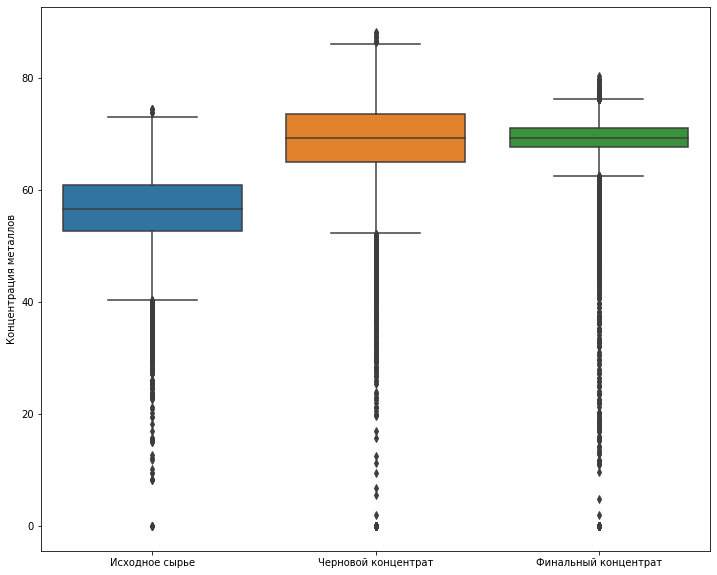

In [30]:
fig = plt.figure(figsize=(12, 10))
ax = sns.boxplot(data=train[['total_rougher_input_concetrate', 'total_rougher_output_concetrate', 'total_final_output_concetrate']])
ax.set_ylabel('Концентрация металлов')
ax.set_xticklabels(['Исходное сырье', 'Черновой концентрат', 'Финальный концентрат'])

### Микровывод

Есть и выбросы, и аномальные значения. Абсолютно точно стоит отсечь нулевые значения (например, меньше 0.5), в то время как остальные выбросы отсекать недопустимо, так как это реальные данные и малые числа встречаются в реальном производстве.

Реальной задаче- реальные числа. Отсекаются только строки с суммарной концентрацией меньше 0.5

In [31]:
for i in ['total_rougher_input_concetrate', 'total_rougher_output_concetrate', 'total_final_output_concetrate']:
    train = train[(train[i] > 0.5)] 

## Вывод

### Концентрация на этапах

За концентрацию отвечают столбцы с concetrate в названии. Посмотрим, как меняется концентрация металлов на этапах: 

- rougher — флотация

- primary_cleaner — первичная очистка

- secondary_cleaner — вторичная очистка - на этом этапе значений концентраций нет, потому что сразу по завершении вторичной очистки получается финальный продукт

- final — финальные характеристики

__Итог__

- По ходу очистки концентрация золота растёт (с 19 % после флотации до 43 % в конце), что соответствует логике процесса.

- При этом падает концентрация серебра (с 12% до 5 %) - равномерно на каждом шагу.

- Концентрация Pb при этом несущественно меняется.

_Однако_ со свинцом сложно сказать наверняка, что происходит с его концентрацией при разных этапах очиски. 

Исходя из графика boxplot, концентрация Свинца в зависимости от этапа меняется незначительно. О закономерностях утверждать нельзя.

### Размер Гранул

Построенный boxplot показывает, что __медианный размер гранул сырья в выборках__ отличается незначительно. (50 на учебной против 55 на тестовой)

В Тестовой выборке меньше выбросов, что слегка сдвигает медиану.

Распределения несильно отличаются друг от друга, оценка модели будет правильной.

### Суммарная концентрация веществ на разных стадиях

Стадии: rougher_input, rouger_output и final (в сырье, в черновом и финальном концентратах.)

Медианы черновой и финальной стадий по концентрациям равны. Медиана концентраций в исходной стадии меньше, что понятно из технологии процесса (мы очищаем металлы от примесей)

Есть и выбросы, и аномальные значения. Абсолютно точно стоит отсечь нулевые значения (например, меньше 0.5), в то время как остальные выбросы отсекать недопустимо, так как это реальные данные и малые числа встречаются в реальном производстве.

Реальной задаче- реальные числа. Отсекаются только строки с суммарной концентрацией меньше 0.5

## 3. Модель

Напишем функцию по вычислению sMAPE:
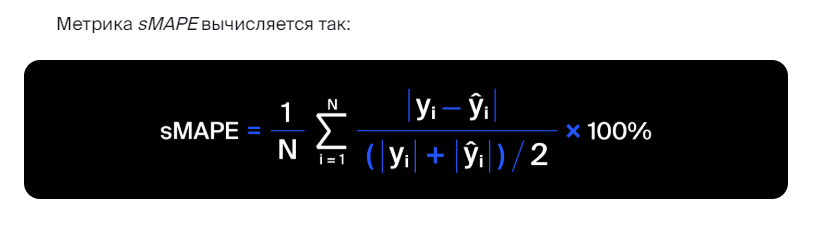

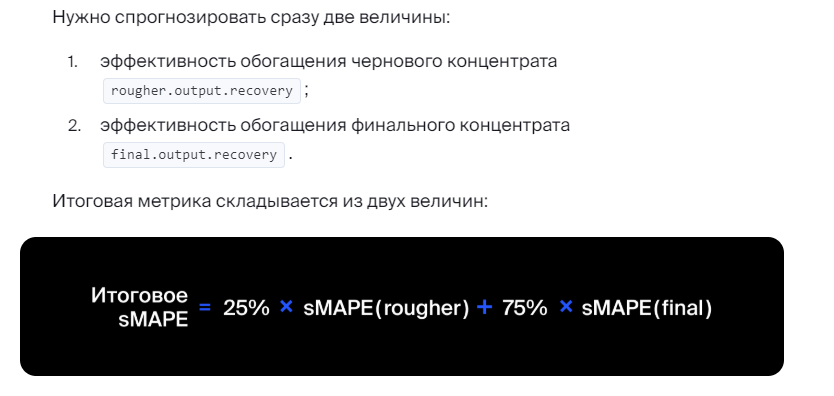



In [32]:
#Функция sMAPE

def sMAPE(targets, predictions):

    delta = (
        abs(targets - predictions)
    / 
        ((abs(targets) + abs(predictions)) / 2)
    )
    
    delta = delta * 100
    smape_all =  delta.sum()
    
    rougher = smape_all['rougher.output.recovery'] / len(delta)
    final = smape_all['final.output.recovery'] / len(delta)
    
    return (0.25 * rougher) + (0.75 * final)

### Выделим признаки для обучения и целевые признаки

Также в признаки не заводим время. Процесс выполняется машинами и от даты выполнения числа зависеть не должны.

In [33]:
features_columns = test.columns.drop(['rougher.output.recovery', 'final.output.recovery', 'date'])

features = train[features_columns]
target  = train.loc[:,['rougher.output.recovery', 'final.output.recovery']]

features_test = test[features_columns]
target_test = test.loc[:,['rougher.output.recovery', 'final.output.recovery']]

### Функция для нахождения наилучших параметров (кросс-валидация)

In [34]:
def find_best_params(model, parameters, verbose=True):
    gridParams = ParameterGrid(parameters)
    
    best_score = None
    best_params = None
        
    for params in gridParams:
        train_model = clone(model)
        train_model.set_params(**params)
        score = cross_val_score(train_model, features, target, cv=5, scoring=make_scorer(sMAPE))
        
        if verbose:
            print('sMAPE =', score.mean(), 'параметры', params)
        
        if (best_params == None) or (score.mean() < best_score.mean()): 
            best_score = score
            best_params = params

    print()
    
    print('Лучшие параметры:', best_params)
    print('Лучшее значение sMAPE:', best_score.mean())
    
    return best_params, best_score

### Разные модели и их качество кросс-валидацией.

__Линейная регрессия__

In [35]:
parameters = {
    "normalize": [False, True]
}

linear_regression = find_best_params(LinearRegression(), parameters)

sMAPE = 10.011849233361318 параметры {'normalize': False}
sMAPE = 10.011849233361335 параметры {'normalize': True}

Лучшие параметры: {'normalize': False}
Лучшее значение sMAPE: 10.011849233361318


__Решающее дерево__

In [36]:
model = DecisionTreeRegressor(random_state=42)

parameters = {
    'max_depth':  [x for x in range(2, 20, 3)],
    'min_samples_split': [x for x in range(2, 5)],
    'min_samples_leaf': [x for x in range(2, 5)]
}

decision_tree = find_best_params(model, parameters, verbose=False)


Лучшие параметры: {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}
Лучшее значение sMAPE: 9.190696189317801


__Случайный лес__

In [37]:
model = RandomForestRegressor(random_state=42)

parameters = {
    'n_estimators':  [x for x in range(40, 90, 10)],
    'max_depth':  [8],
}

random_forest = find_best_params(model, parameters)

sMAPE = 9.550016841983709 параметры {'max_depth': 8, 'n_estimators': 40}
sMAPE = 9.447453305017785 параметры {'max_depth': 8, 'n_estimators': 50}
sMAPE = 9.405935384964026 параметры {'max_depth': 8, 'n_estimators': 60}
sMAPE = 9.362181564925741 параметры {'max_depth': 8, 'n_estimators': 70}
sMAPE = 9.401884220845984 параметры {'max_depth': 8, 'n_estimators': 80}

Лучшие параметры: {'max_depth': 8, 'n_estimators': 70}
Лучшее значение sMAPE: 9.362181564925741


### Микровывод

Кросс-валидацией перебраны и найдены наилучшие параметры для каждой из трёх моделей: случайного леса, линейной регрессии и рещающего дерева.

Результаты:

- Линейная регрессия: Лучшее значение sMAPE: 10.011849233361318

- Решающее дерево: Лучшее значение sMAPE: 9.190696189317801

- Случайный лес: Лучшее значение sMAPE: 9.362181564925741

Остановимся на Случайном лесе.


### Тестирование

In [44]:
def print_test_sMAPE(model):
    score = sMAPE(target_test, model.predict(features_test))
    print("sMAPE", score)

In [45]:
def test_model(model, params):
    model.set_params(**params)
    model.fit(features, target)
    print_test_sMAPE(model)

In [47]:
test_model(RandomForestRegressor(random_state=42), random_forest[0])

sMAPE 9.554731467963858


### Проверка модели на адекватность

Воспользуемся DummyRegressor

In [48]:
test_model(DummyRegressor(), {})

sMAPE 9.826478226249607


DummyRegressor показал худший sMAPE, чем модель. Значит, модель адекватна.

## Вывод

Написана функция по вычислению sMAPE, выделены признаки: обучающие и целевые. Помимо целевых, в обучающие признаки не заводим время. Процесс выполняется машинами и от даты выполнения числа зависеть не должны.

Кросс-валидацией перебраны и найдены наилучшие параметры для каждой из трёх моделей: случайного леса, линейной регрессии и рещающего дерева.

Результаты:

- Линейная регрессия: Лучшее значение sMAPE: 10.011849233361318

- Решающее дерево: Лучшее значение sMAPE: 9.190696189317801

- Случайный лес: Лучшее значение sMAPE: 9.362181564925741

Остановимся на Случайном лесе.


Тестирование показало:

sMAPE 9.554731467963858


DummyRegressor показал худший sMAPE (9.826478226249607), чем модель. Значит, модель адекватна.

___

# Общий вывод

## О задаче

Нужно подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, воспользуемся библиотеками *pandas*, *matplotlib* и *sklearn.* Поможет их документация.

Данные находятся в трёх файлах.

Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.

Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.

Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.

В распоряжении сырые данные: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, проверим их на корректность.

## 1) Подготовка данных

__Три файла открыты и изучены.__ Имеется большое количество цифр, чисел, букв, строк и столбцов.

- Если в обучающей и полной таблицах имеется по 87 столбцов с признаками и показателями, то в тестовой- только 53. В тестовом наборе нет целевых признаков, а некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. 

- Все столбцы во всех таблицах- объекты типа float, при этом столбец date имеет тип object. Исправим это, переведя дату в datetime: так с данными будет проще работать.

__Была рассчитана вручную эффективность обогащения золота:__ значения практически не расходятся с данными в таблице, что значит, что эффективность рассчитана правильно.

- Из подсчёта MAE стало видно, что в датасетах имеются пропуски, по крайней мере, в столбцах, связанных с расчётом эффективности концентрации. Они были удалены.

- Пропуски в других столбцах были заполнены методом _ffill_, так как значения, полученные в близкое время, близки друг к другу численно.

__Все три датасета также избавлены от дупликатов.__

В данных по концентрации металлов содержатся выбросы, но удалять их некорректно - чтобы избежать их влияния, в дальнейшем выбросы будут просто учитываться.

## 2) Анализ

### Концентрация на этапах

За концентрацию отвечают столбцы с concetrate в названии. Посмотрим, как меняется концентрация металлов на этапах: 

- rougher — флотация

- primary_cleaner — первичная очистка

- secondary_cleaner — вторичная очистка - на этом этапе значений концентраций нет, потому что сразу по завершении вторичной очистки получается финальный продукт

- final — финальные характеристики

__Итог__

- По ходу очистки концентрация золота растёт (с 19 % после флотации до 43 % в конце), что соответствует логике процесса.

- При этом падает концентрация серебра (с 12% до 5 %) - равномерно на каждом шагу.

- Концентрация Pb при этом несущественно меняется.

_Однако_ со свинцом сложно сказать наверняка, что происходит с его концентрацией при разных этапах очиски. 

Исходя из графика boxplot, концентрация Свинца в зависимости от этапа меняется незначительно. О закономерностях утверждать нельзя.

### Размер Гранул

Построенный boxplot показывает, что __медианный размер гранул сырья в выборках__ отличается незначительно. (50 на учебной против 55 на тестовой)

В Тестовой выборке меньше выбросов, что слегка сдвигает медиану.

Распределения несильно отличаются друг от друга, оценка модели будет правильной.

### Суммарная концентрация веществ на разных стадиях

Стадии: rougher_input, rouger_output и final (в сырье, в черновом и финальном концентратах.)

Медианы черновой и финальной стадий по концентрациям равны. Медиана концентраций в исходной стадии меньше, что понятно из технологии процесса (мы очищаем металлы от примесей)

Есть и выбросы, и аномальные значения. Абсолютно точно стоит отсечь нулевые значения (например, меньше 0.5), в то время как остальные выбросы отсекать недопустимо, так как это реальные данные и малые числа встречаются в реальном производстве.

Реальной задаче- реальные числа. Отсекаются только строки с суммарной концентрацией меньше 0.5

## 3) Модель

Написана функция по вычислению sMAPE, выделены признаки: обучающие и целевые. Помимо целевых, в обучающие признаки не заводим время. Процесс выполняется машинами и от даты выполнения числа зависеть не должны.

С помощью кросс-валидации были найдены самые выгодные гиперпараметры моделей. Определённо, стоит пользоваться случайным лесом

Результаты:

- Линейная регрессия: Лучшее значение sMAPE: 3.502514223102703

- Решающее дерево: Лучшее значение sMAPE: 3.994902699005732

- Случайный лес: Лу

Остановимся на случайном лесе с параметрами {'max_depth': 8, 'n_estimators': 70}

Тестирование показало:


DummyRegressor показал худший sMAPE, чем модель. Значит, модель адекватна.

__Можно покорять рынки.__

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
    - [x]  Проанализированы и обработаны аномальные значения
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке